## Observations and Insights 

- Weight has a strong impact on tumor size as indidcated by the correlation coefficient.
- Capomulin and Ramicane preform the best at shrinking tumor volume indicated by our boxplot.
- Capomulin Had the highest timepoint count, followed closely by Ramicane as shown in the bar charts.



In [160]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df[df.duplicated(subset = ['Mouse ID','Timepoint'])]



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Rows:")
duplicate


Duplicate Rows:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
bools = df.duplicated(subset = ['Mouse ID','Timepoint'])
cleandf = df[~bools]

In [6]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = cleandf.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites']).groupby(by = 'Drug Regimen').mean().rename(columns = {'Tumor Volume (mm3)':'mean'})
median = cleandf.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites']).groupby(by = 'Drug Regimen').median().rename(columns = {'Tumor Volume (mm3)':'median'})
variance= cleandf.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites']).groupby(by = 'Drug Regimen').var().rename(columns = {'Tumor Volume (mm3)':'variance'})
standard_dev = cleandf.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites']).groupby(by = 'Drug Regimen').std().rename(columns = {'Tumor Volume (mm3)':'standard dev'})
sem = cleandf.drop(columns=['Mouse ID','Sex','Age_months','Weight (g)','Timepoint','Metastatic Sites']).groupby(by = 'Drug Regimen').sem().rename(columns = {'Tumor Volume (mm3)':'sem'})
# Assemble the resulting series into a single summary dataframe.

summary_table = pd.concat([mean,median,variance,standard_dev,sem],axis=1)
summary_table

,mean,median,variance,standard dev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleandf.groupby(by = 'Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

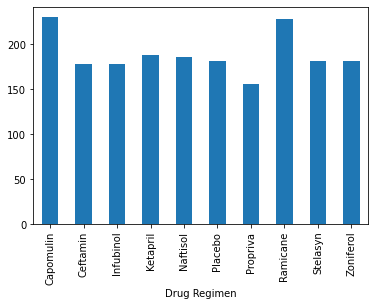

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
totals = cleandf.groupby("Drug Regimen")["Timepoint"].count()

totals.plot(kind = "bar")


In [38]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = [1,2,3,4,5,6,7,8,9,10]
tick_locations = [value+0.4 for value in x_axis]
bar_heights = cleandf.groupby(by = 'Drug Regimen')["Timepoint"].count()
labels = cleandf.groupby(by = 'Drug Regimen').sum().reset_index()
labels_forealz = labels['Drug Regimen']


Text(0.5, 1.0, 'Total Number of Timepoints by Drug Regimen')

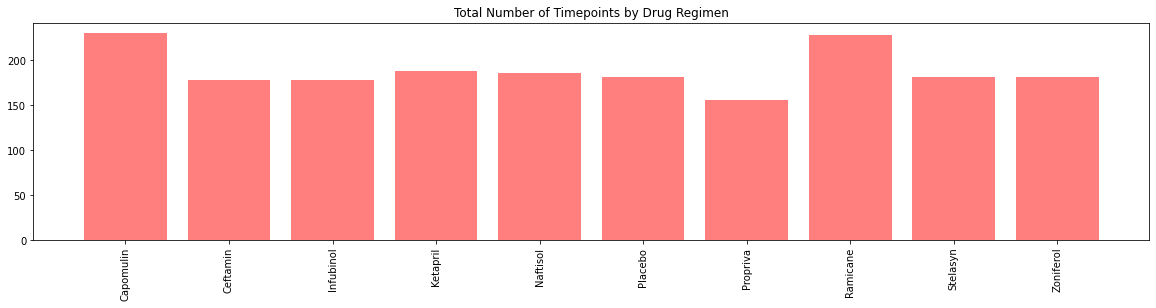

In [50]:
plt.figure(figsize=(20,4))
plt.bar(x_axis,bar_heights , color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations,labels_forealz , rotation="vertical")
plt.title('Total Number of Timepoints by Drug Regimen')

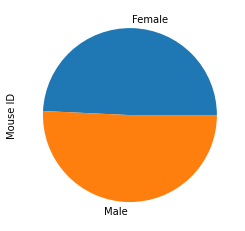

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender = cleandf.groupby('Sex')['Mouse ID'].count()
Gender

Gender.plot.pie()


Text(0.5, 1.0, 'Distribution of Male versus Female Mice')

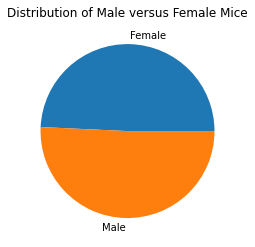

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(x = Gender,labels = ['Female','Male'])
plt.title('Distribution of Male versus Female Mice')

## Quartiles, Outliers and Boxplots

In [103]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
boolss = cleandf.duplicated(subset = ['Mouse ID'], keep = 'last')
big_time = cleandf[~boolss]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#literally_anything = big_time[big_time['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
literally_anything = big_time[ (big_time['Drug Regimen'] == 'Capomulin') | (big_time['Drug Regimen'] == 'Ramicane') | 
                              (big_time['Drug Regimen'] == 'Infubinol') | (big_time['Drug Regimen'] == 'Ceftamin')]
literally_anything

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [153]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = labels_forealz.tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

literally_anything.groupby(by = 'Drug Regimen')['Tumor Volume (mm3)'].describe()
Q1 = literally_anything.groupby(by = 'Drug Regimen')['Tumor Volume (mm3)'].quantile(0.25)
Q3 = literally_anything.groupby(by = 'Drug Regimen')['Tumor Volume (mm3)'].quantile(0.75)
IQR = Q3 - Q1
print("first quartiles:",Q1)
print('\n')
print('third quartiles:',Q3)
print('\n')
print('IQR:',IQR)
print('\n')

upper_fence = Q3  +1.5*IQR
lower_fence = Q1  -1.5*IQR

fences = pd.concat([lower_fence,upper_fence],axis=1)
print('outlier fences:',fences)
print('\n')

new = pd.merge(literally_anything, fences, how='left', on='Drug Regimen')
new.columns = ['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)',
               'Metastatic Sites','Lower Fence', 'Upper Fence']

new["Outlier"] = ~new["Tumor Volume (mm3)"].between(new["Lower Fence"], new["Upper Fence"])

for x in range(len(new)):
    if new['Outlier'].iloc[x] == True:
        print("potential outliers:",new.iloc[x])

first quartiles: Drug Regimen
Capomulin    32.377357
Ceftamin     48.722078
Infubinol    54.048608
Ketapril           NaN
Naftisol           NaN
Placebo            NaN
Propriva           NaN
Ramicane     31.560470
Stelasyn           NaN
Zoniferol          NaN
Name: Tumor Volume (mm3), dtype: float64


third quartiles: Drug Regimen
Capomulin    40.159220
Ceftamin     64.299830
Infubinol    65.525743
Ketapril           NaN
Naftisol           NaN
Placebo            NaN
Propriva           NaN
Ramicane     40.659006
Stelasyn           NaN
Zoniferol          NaN
Name: Tumor Volume (mm3), dtype: float64


IQR: Drug Regimen
Capomulin     7.781863
Ceftamin     15.577752
Infubinol    11.477135
Ketapril           NaN
Naftisol           NaN
Placebo            NaN
Propriva           NaN
Ramicane      9.098537
Stelasyn           NaN
Zoniferol          NaN
Name: Tumor Volume (mm3), dtype: float64


outlier fences:               Tumor Volume (mm3)  Tumor Volume (mm3)
Drug Regimen                      

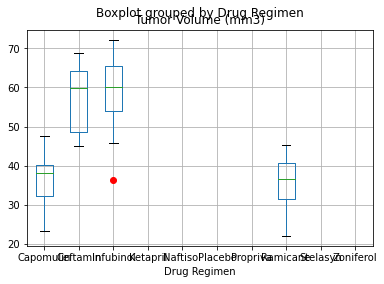

In [159]:
# Generate a box plot of the final tumor volume of each mouse by regimens of interest
literally_anything.boxplot(column = 'Tumor Volume (mm3)', by= 'Drug Regimen', sym='r')


## Line and Scatter Plots

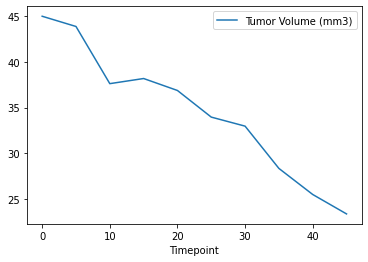

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = cleandf[cleandf['Drug Regimen'] == 'Capomulin' ]
capomulin_mouse = capomulin[capomulin['Mouse ID'] == 's185']
capomulin_plot = capomulin_mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)')


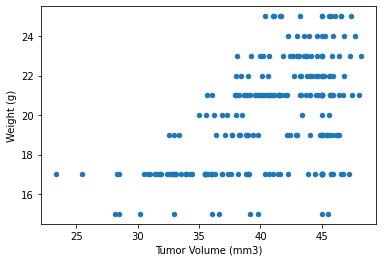

In [95]:
# Generate a scatter plot of tumor volume vs. mouse weight for the Capomulin regimen
capomulin_plot = capomulin.plot.scatter(y='Weight (g)', x='Tumor Volume (mm3)')

## Correlation and Regression

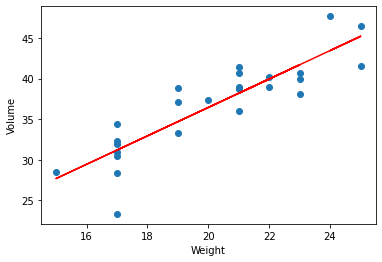

In [120]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomula_cal = big_time[ (big_time['Drug Regimen'] == 'Capomulin')]
x = capomula_cal['Weight (g)']
X = np.array(x).reshape(-1, 1)
y = capomula_cal['Tumor Volume (mm3)']
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.xlabel('Weight')
plt.ylabel('Volume')
plt.show()




In [118]:
Weight =capomula_cal.iloc[:,4]
Volume = capomula_cal.iloc[:,6]
correlation = st.pearsonr(Weight,Volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.88
